In [ ]:
import numpy as np                                                              # Importieren aller benötigten Pakete
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import folium
from folium.plugins import HeatMap
import ipywidgets as widgets
from IPython.display import display, HTML
import plotly.express as px


DE = '/content/renewable_power_plants_DE.csv'                                   # Festlegen von Variablen für die verwendeten Länder
EU = '/content/renewable_power_plants_EU.csv'
FR = '/content/renewable_power_plants_FR.csv'

tex = FR                                                                        # Die Variable wird standartmäßig mit Frankreich belegt

In [ ]:
                                                                                #CSS-Stil für die Positionierung der Buttons
css_style_buttons = """

<style>
    .button-row {
        display: flex;                                                          # Fenster groß
        justify-content: center;                                                # mittige ausrichtung
        margin-top: 20px;                                                       # Abstand oben
    }
    .button-row button {
        margin: 0 10px;                                                         # Abstand links-rechts
    }
</style>
"""

text_html = "<div class='center-text'>Renewable_Power_Plants</div>"             # HTML-Element für den Text
html_code =  css_style_buttons + text_html                                      # HTML-Code zusammenstellen

# Funktionen für Button-Klick
def on_button_clickde(b):                                                       # Wenn Button ist gedrückt
    global tex                                                                  # Globale Variable tex

    tex = DE                                                                    # DE in tex laden
    print("Daten von Deutschland werden geladen")                               # Ausgaben von Text


def on_button_clickeu(b):                                                       # Wenn Button ist gedrückt
    global tex                                                                  # Globale Variable tex

    tex = EU                                                                    # EU in tex laden
    print("Daten der EU werden geladen")                                        # Ausgaben von Text


def on_button_clickfr(b):                                                       # Wenn Button ist gedrückt
    global tex                                                                  # Globale Variable tex

    tex = FR                                                                    # FR in tex laden
    print("Daten von Frankreich werden geladen")                                # Ausgaben von Text



text = "Wähle aus welche Datei du untersuchen willst"
text2 = "Standartmäßig wird die Datei Frankreich.csv untersucht"
empty_line_html = "<div style='height: 20px'></div>"

# Buttons erstellen
buttonde = widgets.Button(description='Deutschland')                            # Buttonnamen
buttoneu = widgets.Button(description='EU')                                     # Buttonnamen
buttonfr = widgets.Button(description='Frankreich')                             # Buttonnamen


# Funktionen mit Button-Klick verknüpfen
buttonde.on_click(on_button_clickde)                                            # Wenn Button gedrückt rufe on_button_clickde auf
buttoneu.on_click(on_button_clickeu)                                            # Wenn Button gedrückt rufe on_button_clickeu auf
buttonfr.on_click(on_button_clickfr)                                            # Wenn Button gedrückt rufe on_button_clickfr auf

# GUI-Elemente anzeigen
display(HTML(html_code), text, text2,                                           #Elemente auf GUI anzeigen
        HTML(empty_line_html), HTML(empty_line_html),
        widgets.HBox([buttonde, buttoneu, buttonfr])
       )

'Wähle aus welche Datei du untersuchen willst'

'Standartmäßig wird die Datei Frankreich.csv untersucht'

Daten von Frankreich werden geladen


In [ ]:
ds = pd.read_csv(tex)                                                           # tex enthält variabel das ausgewählte Land
ds.tail()                                                                       # tail der jeweiligen csv anzeigen

<ipython-input-32-b42b93716dd5>:1: DtypeWarning:

Columns (22) have mixed types. Specify dtype option on import or set low_memory=False.



,electrical_capacity,energy_source_level_1,energy_source_level_2,energy_source_level_3,technology,data_source,nuts_1_region,nuts_2_region,nuts_3_region,lon,...,departement,departement_code,commissioning_date,connection_date,disconnection_date,number_of_installations,site_name,IRIS_code,EIC_code,as_of_year
56092,0.00300,Renewable energy,Solar,NaN,Photovoltaics,Ministry for the Ecological and Inclusive Tran...,FR1,FR10,FR108,1.930226,...,NaN,NaN,NaN,NaN,NaN,<3,Aggregated data for Vigny,NaN,NaN,2017
56093,0.00500,Renewable energy,Solar,NaN,Photovoltaics,Ministry for the Ecological and Inclusive Tran...,FR1,FR10,FR108,2.356976,...,NaN,NaN,NaN,NaN,NaN,<3,Aggregated data for Villaines-sous-Bois,NaN,NaN,2017
56094,0.01728,Renewable energy,Solar,NaN,Photovoltaics,Ministry for the Ecological and Inclusive Tran...,FR1,FR10,FR108,2.534369,...,NaN,NaN,NaN,NaN,NaN,5,Aggregated data for Villeron,NaN,NaN,2017
56095,0.00250,Renewable energy,Solar,NaN,Photovoltaics,Ministry for the Ecological and Inclusive Tran...,FR1,FR10,FR108,1.730096,...,NaN,NaN,NaN,NaN,NaN,<3,Aggregated data for Villers-en-Arthies,NaN,NaN,2017
56096,0.00594,Renewable energy,Solar,NaN,Photovoltaics,Ministry for the Ecological and Inclusive Tran...,FR1,FR10,FR108,2.238474,...,NaN,NaN,NaN,NaN,NaN,<3,Aggregated data for Villiers-Adam,NaN,NaN,2017


In [ ]:
ds.shape                                                                        # Spalten und Zeilen Anzahl der jeweiligen csv ausgeben

(56097, 27)

In [ ]:
ds.info()                                                                       # Infos über die Spalten der jeweiligen csv ausgeben lassen

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56097 entries, 0 to 56096
Data columns (total 27 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   electrical_capacity      56097 non-null  float64
 1   energy_source_level_1    56097 non-null  object 
 2   energy_source_level_2    56097 non-null  object 
 3   energy_source_level_3    512 non-null    object 
 4   technology               55582 non-null  object 
 5   data_source              56097 non-null  object 
 6   nuts_1_region            55861 non-null  object 
 7   nuts_2_region            55861 non-null  object 
 8   nuts_3_region            55861 non-null  object 
 9   lon                      55856 non-null  float64
 10  lat                      55856 non-null  float64
 11  municipality             55897 non-null  object 
 12  municipality_code        55692 non-null  float64
 13  region                   40787 non-null  object 
 14  region_code           

In [ ]:
ds.describe()

,electrical_capacity,lon,lat,municipality_code,region_code,municipality_group_code,departement_code,IRIS_code,as_of_year
count,56097.000000,55856.000000,55856.000000,55692.000000,40787.000000,4.056100e+04,40701.000000,2.979700e+04,56097.000000
mean,0.465744,2.502818,46.390964,46112.238221,63.024616,2.151305e+08,45.537849,4.364409e+08,2017.727080
std,1.957015,2.699479,2.197709,25773.241448,22.363030,2.113737e+07,25.965298,2.524681e+08,0.445464
min,0.001000,-5.085638,41.435524,1001.000000,11.000000,2.000002e+08,1.000000,1.001000e+07,2017.000000
25%,0.026260,0.385604,44.400070,24447.250000,44.000000,2.000600e+08,23.000000,2.224300e+08,2017.000000
50%,0.078240,2.493446,46.412190,45120.000000,75.000000,2.000699e+08,44.000000,4.028401e+08,2018.000000
75%,0.115700,4.715823,48.293826,67273.000000,76.000000,2.430006e+08,67.000000,6.513800e+08,2018.000000
max,80.000000,9.529433,51.072948,95680.000000,93.000000,2.495005e+08,95.000000,9.563701e+08,2018.000000


<ipython-input-8-78c8f886fc1a>:1: DtypeWarning: Columns (22) have mixed types. Specify dtype option on import or set low_memory=False.
  dsFR = pd.read_csv(FR)                                                          # Data Cleaning für FR


<Axes: >

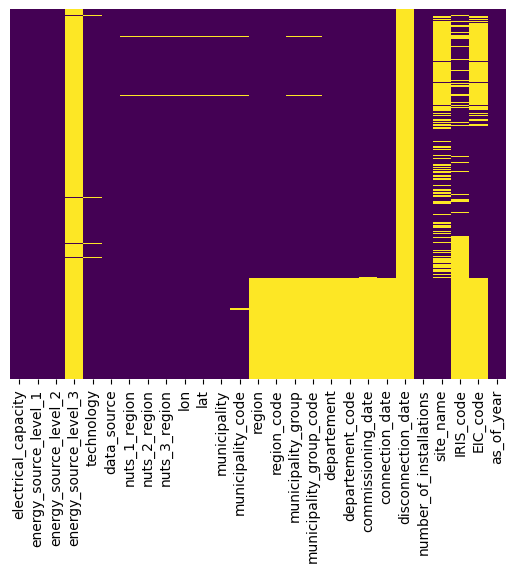

In [ ]:
dsFR = pd.read_csv(FR)                                                          # Data Cleaning für FR
sns.heatmap(dsFR.isnull(),yticklabels=False,cbar=False,cmap='viridis')          # Zeigt die Nullwerte für jede Spalte, anhand einer Heatmap.

<Axes: >

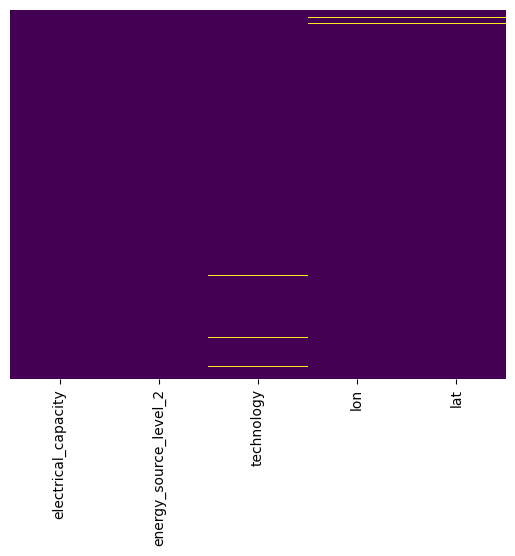

In [ ]:
#Drop Columns/Entferne die unnötigen Spalten.
dsFR = dsFR.drop(columns=['energy_source_level_1', 'energy_source_level_3','region','region_code', 'as_of_year', 'data_source', 'nuts_1_region', 'nuts_2_region', 'nuts_3_region', 'departement', 'departement_code', 'commissioning_date', 'connection_date', 'disconnection_date', 'number_of_installations', 'site_name',	'IRIS_code', 'EIC_code', 'municipality', 'municipality_code', 'municipality_group', 'municipality_group_code'])
sns.heatmap(dsFR.isnull(),yticklabels=False,cbar=False,cmap='viridis')

<ipython-input-10-3e6cc3fcf58e>:1: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  dsEU = pd.read_csv(EU)                                                          # Data Cleaning für EU


<Axes: >

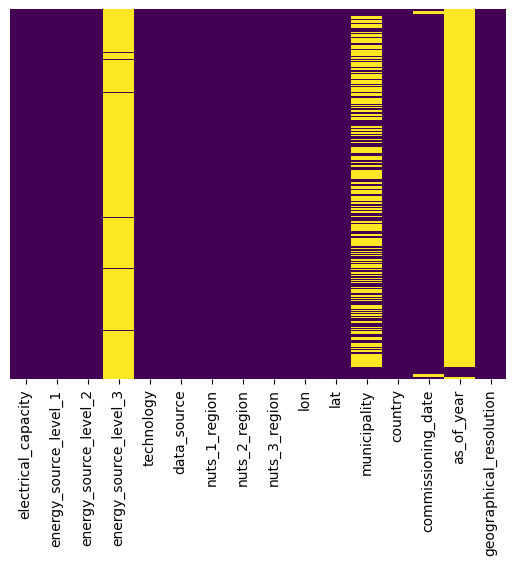

In [ ]:
dsEU = pd.read_csv(EU)                                                          # Data Cleaning für EU
sns.heatmap(dsEU.isnull(),yticklabels=False,cbar=False,cmap='viridis')          # Zeigt die Nullwerte für jede Spalte, anhand einer Heatmap.

<Axes: >

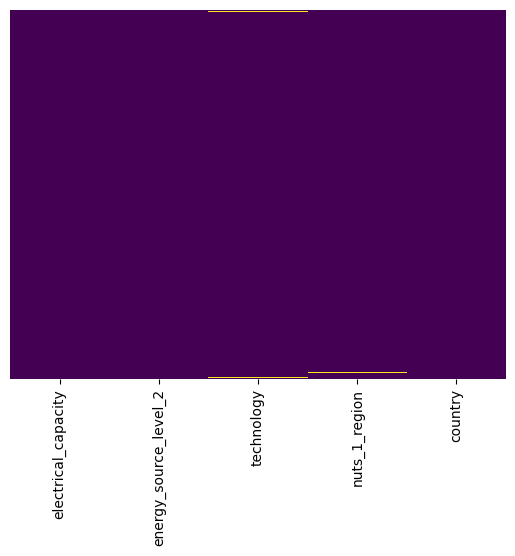

In [ ]:
#Drop Columns/Entferne die unnötigen Spalten.
dsEU = dsEU.drop(columns=['energy_source_level_1', 'energy_source_level_3', 'data_source', 'nuts_2_region', 'nuts_3_region', 'lon', 'lat', 'municipality', 'commissioning_date', 'as_of_year', 'geographical_resolution'])
sns.heatmap(dsEU.isnull(),yticklabels=False,cbar=False,cmap='viridis')

<ipython-input-12-d1e735cfdd6c>:1: DtypeWarning: Columns (14,19) have mixed types. Specify dtype option on import or set low_memory=False.
  dsDE = pd.read_csv(DE)                                                          # Data Cleaning für DE


<Axes: >

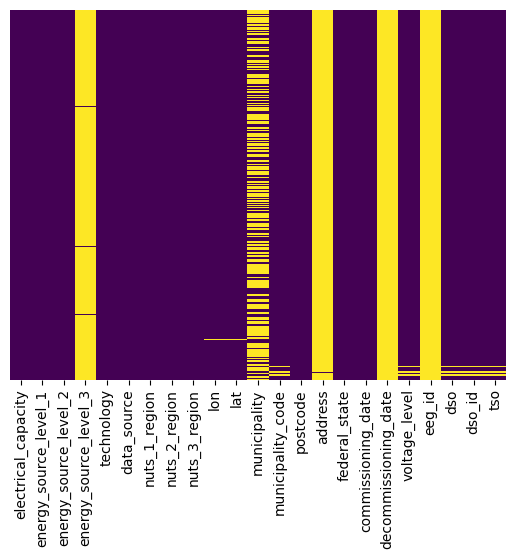

In [ ]:
dsDE = pd.read_csv(DE)                                                          # Data Cleaning für DE
sns.heatmap(dsDE.isnull(),yticklabels=False,cbar=False,cmap='viridis')          # Zeigt die Nullwerte für jede Spalte, anhand einer Heatmap.

<Axes: >

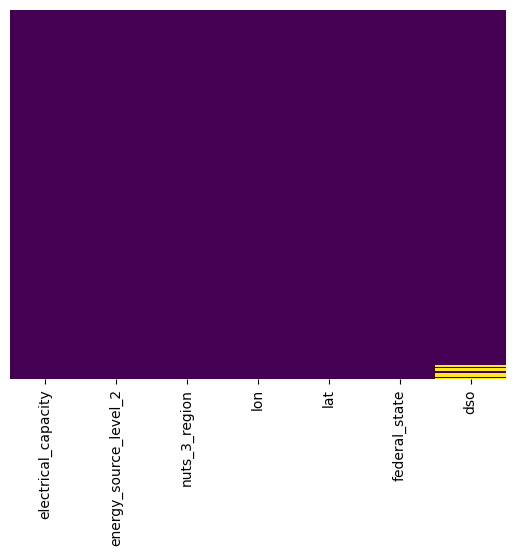

In [ ]:
#Drop Columns/Entferne die unnötigen Spalten.
dsDE = dsDE.drop(columns=['energy_source_level_1', 'energy_source_level_3', 'technology', 'data_source', 'nuts_1_region', 'nuts_2_region', 'municipality', 'municipality_code', 'postcode', 'address', 'commissioning_date', 'decommissioning_date', 'voltage_level', 'eeg_id', 'dso_id', 'tso'])
sns.heatmap(dsDE.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [ ]:
# Entferne Zeilen mit NaN-Werten in den Koordinaten
df_de_cleaned = dsDE.dropna(subset=['lat', 'lon'])

# Mittelpunkt der Karte (Durchschnitt der Koordinaten)
map_center = [df_de_cleaned['lat'].mean(), df_de_cleaned['lon'].mean()]

# Erstelle eine Deutschlandkarte als Hintergrund
germany_map = folium.Map(location=map_center, zoom_start=6, tiles='http://a.tile.openstreetmap.de/tiles/osmde/{z}/{x}/{y}.png',
                         attr='&copy; <a href="https://www.openstreetmap.de/karte.html">OpenStreetMap Deutschland</a> contributors')

# Extrahiere die Koordinaten aus dem bereinigten Datensatz
coordinates = df_de_cleaned[['lat', 'lon']].values

# Füge die Heatmap hinzu
HeatMap(coordinates, radius=15, blur=10, gradient={0.4: 'blue', 0.8: 'yellow', 1: 'red'}, min_opacity=0.4).add_to(germany_map)

# Speichere die Karte in einer Datei (zum Beispiel "heatmap_on_germany_map.html")
germany_map.save("heatmap_on_germany_map.html")

# Anzeigen der Karte im Jupyter Notebook
germany_map

In [ ]:
energiequellen_liste = dsDE['dso'].value_counts()                               # Zähle die Anzahl der Energiequellen nach Betreibern

energiequellen_nach_betreiber = energiequellen_liste[:15]                       # Die größten 15 Betreiber in eine separate Variable

sonstige_anzahl = energiequellen_liste[15:].sum()                               # Summe der Anzahl der Energiequellen der Betreiber in eine extra Variable

energiequellen_nach_betreiber['Sonstige'] = sonstige_anzahl                     # Hinzufügen von 'Sonstige' in die Liste der größten 15 Betreiber

Betreiber = energiequellen_nach_betreiber.index                                 # Daten für das Diagramm
Anzahl = energiequellen_nach_betreiber.values


# Erstellen des interaktiven Kreisdiagramms mit Plotly
fig = px.pie(names=Betreiber, values=Anzahl, title='Anzahl der Energiequellen nach Betreibern')
fig.update_traces(hoverinfo='label+value', textinfo='percent', hovertemplate='%{label}: %{value}')  # Aktualisieren Sie hoverinfo und textinfo
fig.show()

In [ ]:
energiequellen_art = dsDE.groupby('energy_source_level_2')['electrical_capacity'].sum()   # Zähle die Anzahl der Energiequellen nach Betreibern

energiequellen_art = energiequellen_art.sort_values(ascending=False)            # Sortie Absteigend nach der Kapazität

# Plot erstellen
fig = px.bar(x=energiequellen_art.index, y=energiequellen_art.values,
             title='Art der Energiequelle in Deutschland',
             labels={'x': 'Energiequelle', 'y': 'Elektrische Kapazität (MW)'},
             width=800, height=600)

fig.update_layout(xaxis={'title': 'Art der Energiequelle'}, yaxis={'title': 'Elektrische Kapazität (MW)'})

fig.show()                                                                      # Diagramm anzeigen

In [ ]:
energiequellen_bl = dsDE.groupby('nuts_3_region')['electrical_capacity'].sum()  # Summiere die installierte Leistung nach Regionen

energiequellen_bl = energiequellen_bl.round(2)                                  # Runde auf 2 Nachkommastellen

energiequellen_bl = energiequellen_bl.sort_values(ascending=False)

NUTS = '/content/NUTS2021.csv'                                                  # Einbinden der Datei NUTS2021.csv als Unterstützung um die Regionscodes in die Gemeinden umzuwandeln

dsNUTS = pd.read_csv(NUTS)                                                      # Zeigt die Nullwerte für jede Spalte, anhand einer Heatmap.

dsNUTS = dsNUTS.drop(columns=['Country', 'NUTS level 1','NUTS level 2','NUTS level','Country order', 'Region order'])
# NUTS level 3 ist noch vorhanden mit dem benötigten NUTS Code
print(dsNUTS)

     Code 2021                                       NUTS level 3
0           BE                                                NaN
1          BE1                                                NaN
2         BE10                                                NaN
3        BE100  Arr. de Bruxelles-Capitale/Arr. Brussel-Hoofdstad
4          BE2                                                NaN
...        ...                                                ...
1839     UKN0F                                Mid and East Antrim
1840     UKN0G                                Fermanagh and Omagh
1841       UKZ                                                NaN
1842      UKZZ                                                NaN
1843     UKZZZ                                 Extra-Regio NUTS 3

[1844 rows x 2 columns]


In [ ]:
# Merge DataFrames basierend auf der Spalte 'nuts_3_region'
merged_data = pd.merge(energiequellen_bl, dsNUTS, left_index=True, right_on='Code 2021')

merged_data = merged_data.drop(columns=['Code 2021'])

merged_data = merged_data[:15]                                                  # Die größten 15 Regionen beibehalten

regionen = merged_data['NUTS level 3']                                          # Daten für das Diagramm
kapazitaet = merged_data['electrical_capacity']

# Erstellen des Balkendiagramms mit Plotly
fig = px.bar(x=regionen, y=kapazitaet,
             title='Elektrische Kapazität erneuerbarer Energiequellen nach Regionen',
             labels={'x': 'Region', 'y': 'Elektrische Kapazität (MW)'},
             width=800, height=600)

fig.update_layout(xaxis={'title': 'Region'}, yaxis={'title': 'Elektrische Kapazität (MW)'})

fig.show()                                                                      # Diagramm anzeigen

In [ ]:
energiequellen_bl = dsDE.groupby('federal_state')['electrical_capacity'].sum()  # Gruppieren nach Bundesland und Summieren der elektrischen Kapazitäten

energiequellen_bl = energiequellen_bl.drop(index='Ausland', errors='ignore')    # Löschen falscher Einträge unter dem Reiter Ausland
energiequellen_bl = energiequellen_bl.drop(index='Ausschließliche Wirtschaftszone', errors='ignore')    # Löschen falscher Einträge unter dem Reiter Ausschließliche Wirtschaftszone

energiequellen_bl['Baden-Württemberg'] += energiequellen_bl.get('Baden-Würtemberg', 0)      # Füge die Werte von Baden-Württemberg und Baden-Würtemberg zusammen
energiequellen_bl = energiequellen_bl.drop(index='Baden-Würtemberg', errors='ignore')       # Lösche die falsche Spalte Baden-Würtemberg

energiequellen_bl['Berlin '] += energiequellen_bl.get('Berlin', 0)              # Füge die Werte von Berlin und Berlin zusammen
energiequellen_bl = energiequellen_bl.drop(index='Berlin', errors='ignore')     # Lösche die falsche Spalte Berlin

energiequellen_bl = energiequellen_bl.sort_values(ascending=False)              # Sortieren nach elektrischer Kapazität

# Plot erstellen
fig = px.bar(x=energiequellen_bl.index, y=energiequellen_bl.values,
             title='Elektrische Kapazität erneuerbarer Energiequellen nach Bundesland',
             labels={'x': 'Bundesland', 'y': 'Elektrische Kapazität(MW)'},
             width=800, height=600)

fig.update_layout(xaxis={'title': 'Bundesland'}, yaxis={'title': 'Elektrische Kapazität (MW)'})

fig.show()                                                                      # Diagramm anzeigen

In [ ]:
# EU Heatmap

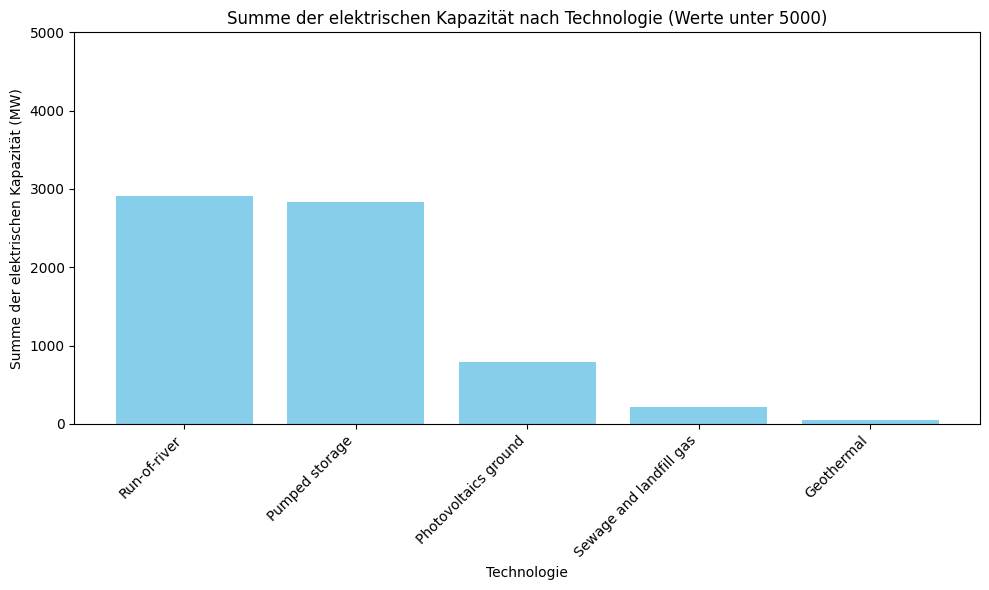

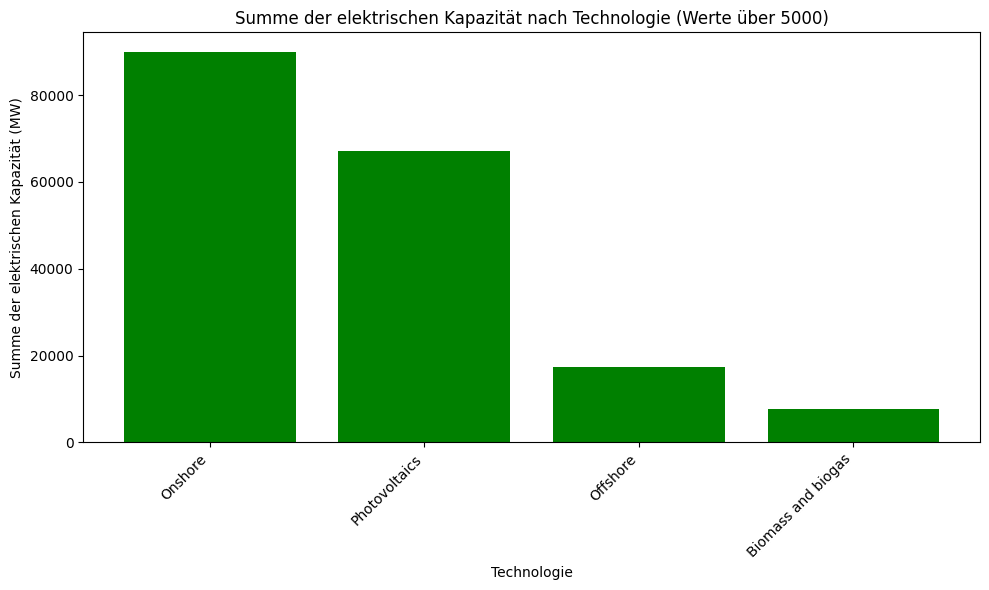

In [ ]:
# Gruppieren und Summieren der elektrischen Kapazität nach Technologie
capacity_by_technology = dsEU.groupby('technology')['electrical_capacity'].sum()

# Sortieren nach Wert
capacity_by_technology_sorted = capacity_by_technology.sort_values(ascending=False)

# Entfernen von Fehlerwerten
capacity_by_technology_sorted = capacity_by_technology_sorted.drop(index='Combustion engine', errors='ignore')
capacity_by_technology_sorted = capacity_by_technology_sorted.drop(index='Other or unspecified technology', errors='ignore')
capacity_by_technology_sorted = capacity_by_technology_sorted.drop(index='Unknown or unspecified technology', errors='ignore')

# Werte unter 5000
small_values = capacity_by_technology_sorted[capacity_by_technology_sorted <= 5000]

# Werte über 5000
large_values = capacity_by_technology_sorted[capacity_by_technology_sorted > 5000]

# Diagramm für Werte unter 5000
plt.figure(figsize=(10, 6))
plt.bar(small_values.index, small_values, color='skyblue')
plt.title('Summe der elektrischen Kapazität nach Technologie (Werte unter 5000)')
plt.xlabel('Technologie')
plt.ylabel('Summe der elektrischen Kapazität (MW)')
plt.xticks(rotation=45, ha='right')  # x-Achsenbeschriftungen drehen
plt.ylim(0, 5000)  # Skalierung der y-Achse bis 5000

plt.tight_layout()
plt.show()

# Diagramm für Werte über 5000
plt.figure(figsize=(10, 6))
plt.bar(large_values.index, large_values, color='green')
plt.title('Summe der elektrischen Kapazität nach Technologie (Werte über 5000)')
plt.xlabel('Technologie')
plt.ylabel('Summe der elektrischen Kapazität (MW)')
plt.xticks(rotation=45, ha='right')  # x-Achsenbeschriftungen drehen

plt.tight_layout()
plt.show()

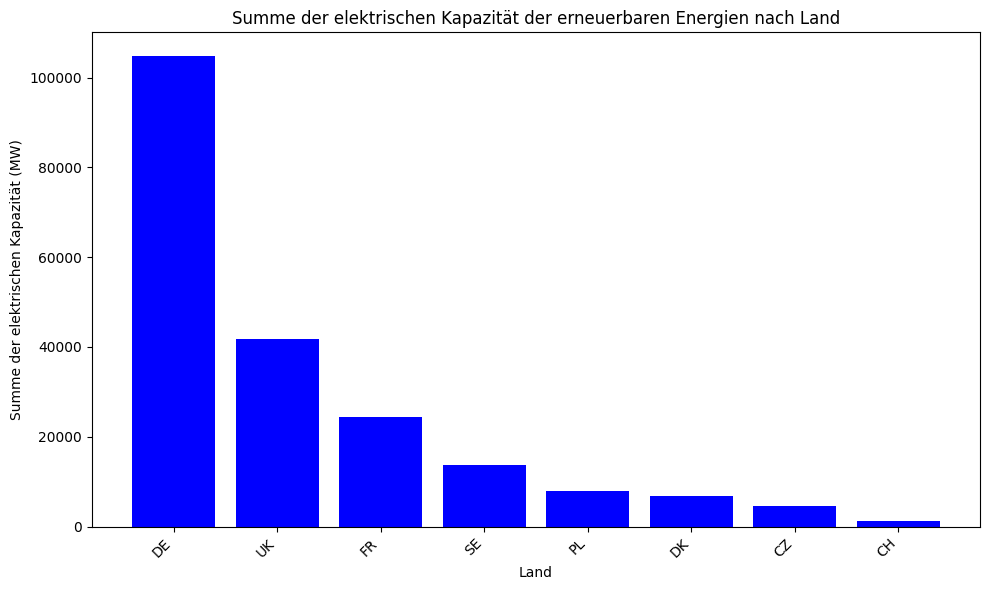

In [ ]:
# Extrahieren der ersten beiden Buchstaben aus der Spalte 'nuts_1_region'
dsEU['country'] = dsEU['nuts_1_region'].str[:2]

# Gruppieren und Summieren der elektrischen Kapazität nach Land
capacity_by_country = dsEU.groupby('country')['electrical_capacity'].sum().reset_index()

# Sortieren nach Kapazität
capacity_by_country_sorted = capacity_by_country.sort_values(by='electrical_capacity', ascending=False)

# Plot
plt.figure(figsize=(10, 6))
plt.bar(capacity_by_country_sorted['country'], capacity_by_country_sorted['electrical_capacity'], color='blue')
plt.title('Summe der elektrischen Kapazität der erneuerbaren Energien nach Land')
plt.xlabel('Land')
plt.ylabel('Summe der elektrischen Kapazität (MW)')
plt.xticks(rotation=45, ha='right')  # x-Achsenbeschriftungen drehen
plt.tight_layout()
plt.show()

In [ ]:
# Entferne Zeilen mit NaN-Werten in den Koordinaten
df_fr_cleaned = dsFR.dropna(subset=['lat', 'lon'])

# Mittelpunkt der Karte (Durchschnitt der Koordinaten)
map_center = [df_fr_cleaned['lat'].mean(), df_fr_cleaned['lon'].mean()]

# Erstelle eine Frankreich-Karte als Hintergrund
france_map = folium.Map(location=map_center, zoom_start=6, tiles='http://a.tile.openstreetmap.de/tiles/osmde/{z}/{x}/{y}.png',
                         attr='&copy; <a href="https://www.openstreetmap.de/karte.html">OpenStreetMap Frankreich</a> contributors')

# Extrahiere die Koordinaten aus dem bereinigten Datensatz
coordinates = df_fr_cleaned[['lat', 'lon']].values

# Füge die Heatmap hinzu
HeatMap(coordinates, radius=15, blur=10, gradient={0.1: 'blue', 0.8: 'yellow', 1: 'red'}, min_opacity=0.4).add_to(france_map)

# Speichere die Karte in einer Datei (zum Beispiel "heatmap_on_france_map.html")
france_map.save("heatmap_on_france_map.html")

# Anzeigen der Karte im Jupyter Notebook
france_map

In [ ]:
energiequellen_art = dsFR.groupby('energy_source_level_2')['electrical_capacity'].sum()   # Zähle die Anzahl der Energiequellen nach Betreibern

energiequellen_art = energiequellen_art.sort_values(ascending=False)            # Sortie Absteigend nach der Kapazität

# Plot erstellen
fig = px.bar(x=energiequellen_art.index, y=energiequellen_art.values,
             title='Art der Energiequelle in Frankreich',
             labels={'x': 'Energiequelle', 'y': 'Elektrische Kapazität (MW)'},
             width=800, height=600)

fig.update_layout(xaxis={'title': 'Art der Energiequelle'}, yaxis={'title': 'Elektrische Kapazität (MW)'})

fig.show()